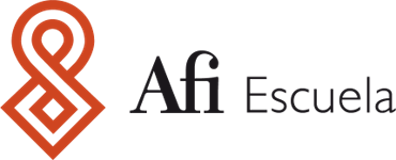

# API - YahooFinance


**Verónica Ruiz Méndez - Mayo 2023**

Curso Análisis de Datos para Financieros - Afi Escuela de Finanzas

*Autor*: [Verónica Ruiz Méndez](https://www.linkedin.com/in/veronica-ruiz-mendez/) 

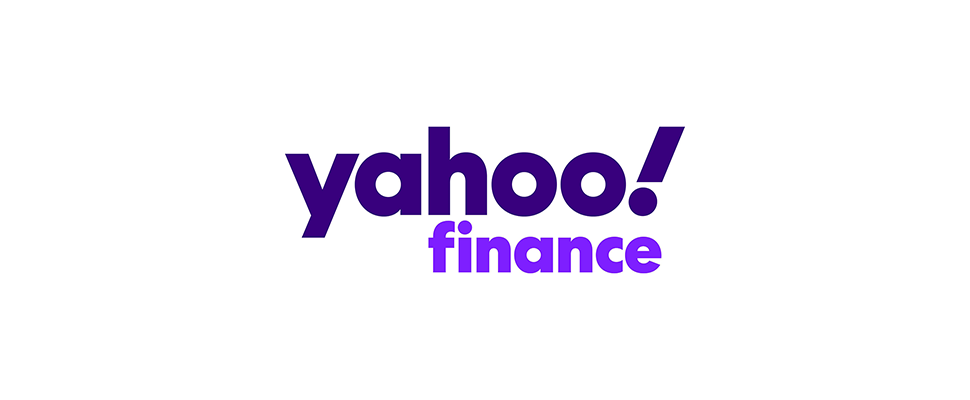


Para obtener datos financieros desde Python existen infinidad de posibilidades, tanto freemium como premium. Obviamente las posibilidades que nos ofrecen las opciones premium son más amplias. Pero la mayoría de las opciones freemium son válidas para muchos de los análisis financieros que se realizan.

Aquí se utiliza uno de los métodos más frecuentes empleados por la comunidad. Los datos que vamos a obtener son los que se reflejan en la web de *Yahoo Finance* y lo vamos a hacer utilizando la API contenida en el módulo [yfinance](https://pypi.org/project/yfinance/).

Con [yfinance](https://pypi.org/project/yfinance/) podemos obtener desde datos históricos hasta datos descriptivos de los activos financieros.

### <font color='#00954c'>**Cálculo de las Bandas de Bollinger con pandas**</font>

Las bandas de Bollinger son unos indicadores utilizados en el análisis técnico de los mercados financieros. Fueron introducidos por John Bollinger en los años 80.

La representación de las bandas de Bollinger son dos curvas que envuelven el gráfico de precios. Se calculan a partir de una media móvil (simple o exponencial), habitualmente para las últimas 20 sesiones, sobre el precio de cierre a la que envuelven dos bandas que se obtienen de añadir y substraer al valor de la media K desviaciones estándar (habitualmente, K=2). La distancia entre las curvas superior e inferior, igual a cuatro desviaciones estándar, es por lo tanto una media de la volatilidad del precio del activo.

De acuerdo con el análisis técnico, si los precios sobrepasan las bandas indica que el mercado está sobrecomprado (si lo hacen por arriba) o sobrevendido (si lo hacen por abajo).

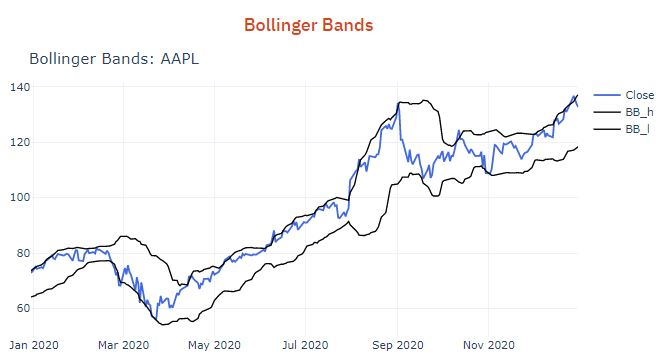

In [ ]:
#!pip install yfinance

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ticker = 'AAPL'

In [3]:
ticker

'AAPL'

In [4]:
ticker_info = yf.Ticker(ticker)

In [5]:
ticker_info

yfinance.Ticker object <AAPL>

In [6]:
ticker_info.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscriptio

In [7]:
ticker_info.info['longName']

'Apple Inc.'

In [8]:
print(f"Nombre completo del activo: {ticker_info.info['longName']}")

Nombre completo del activo: Apple Inc.


In [9]:
print(f"Sector del activo: {ticker_info.info['sector']}")

Sector del activo: Technology


In [10]:
print(f"País del activo: {ticker_info.info['country']}")

País del activo: United States


In [11]:
df_market = yf.download(ticker, start="2019-12-31", end='2021-01-01')

[*********************100%***********************]  1 of 1 completed


In [12]:
df_market

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.810928,100805600
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449402,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735329,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314880,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970093,108872000
...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,130.205780,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.862686,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,133.067001,121047300


In [13]:
df_market.shape

(254, 6)

In [14]:
df_market.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [15]:
df_market.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [16]:
df_market.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.810928,100805600
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449402,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735329,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314880,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970093,108872000


In [17]:
df_market.index

DatetimeIndex(['2019-12-31', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=254, freq=None)

In [18]:
min(df_market.index)

Timestamp('2019-12-31 00:00:00')

In [19]:
max(df_market.index)

Timestamp('2020-12-31 00:00:00')

In [20]:
df_market.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Text(0.5, 1.0, 'Boxplot de AAPL')

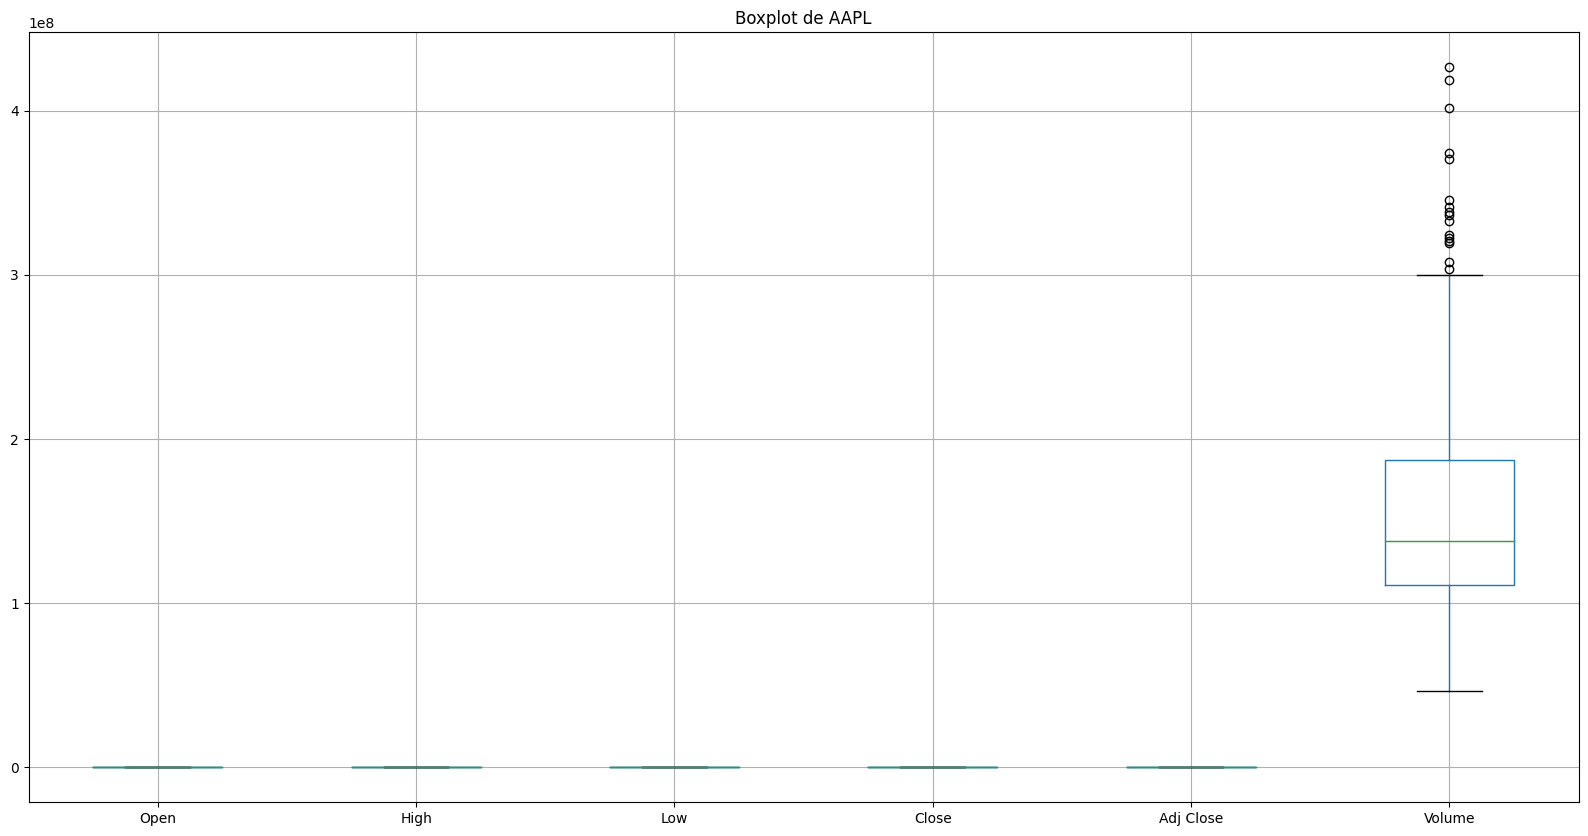

In [21]:
plt.figure(figsize=(20,10))
df_market.boxplot()
plt.title('Boxplot de AAPL')

In [22]:
df_market.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [23]:
df_market[['Open', 'High', 'Low', 'Close', 'Adj Close']]

,Open,High,Low,Close,Adj Close
Date,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.810928
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449402
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735329
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314880
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970093
...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,130.205780
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.862686
2020-12-29,138.050003,138.789993,134.339996,134.869995,133.067001


<Axes: >

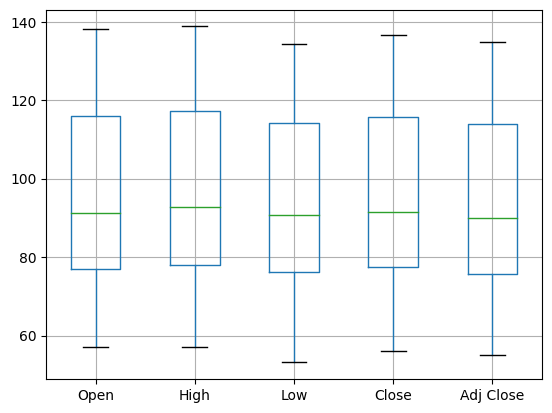

In [24]:
df_market[['Open', 'High', 'Low', 'Close', 'Adj Close']].boxplot()

Text(0.5, 1.0, 'Histograma de Volume')

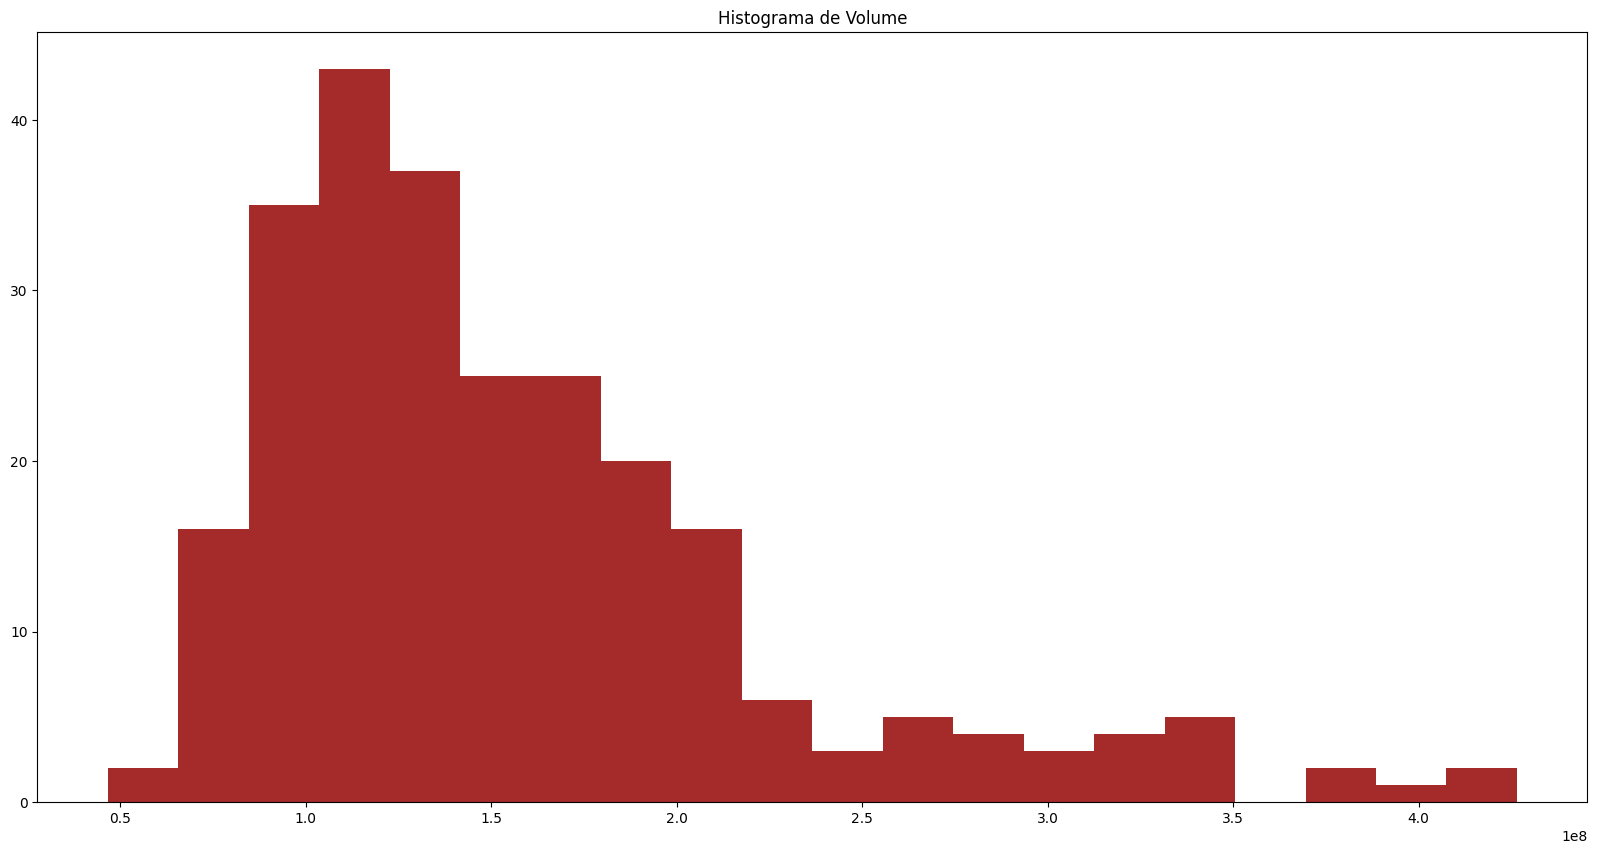

In [25]:
plt.figure(figsize=(20,10))
plt.hist(df_market['Volume'], color='brown', bins=20)
plt.title('Histograma de Volume')

In [26]:
df_market.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,95.177963,96.570266,93.828021,95.260718,93.686752,1.573412e+08
std,22.014834,22.099098,21.579560,21.810137,21.661717,6.978352e+07
min,57.020000,57.125000,53.152500,56.092499,54.999004,4.669130e+07
25%,76.863749,77.998749,76.109377,77.379377,75.696772,1.107637e+08
50%,91.264999,92.793751,90.738750,91.421249,89.881691,1.379199e+08
75%,115.924374,117.275000,114.129997,115.739374,113.995461,1.870393e+08
max,138.050003,138.789993,134.339996,136.690002,134.862686,4.265100e+08


### Conectar con Drive para guardar dataframe generado a través de la API

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
df_market.to_csv('drive/My Drive/CLASES/AnalisisDatosFinancieros2023/data/df_market.csv', sep=';')

# Bandas de Bollinger

In [29]:
df_bb = pd.DataFrame()

In [30]:
df_bb['Close'] = df_market['Close']

In [31]:
type(df_bb['Close'])

pandas.core.series.Series

In [32]:
df_bb

,Close
Date,
2019-12-31,73.412498
2020-01-02,75.087502
2020-01-03,74.357498
2020-01-06,74.949997
2020-01-07,74.597504
...,...
2020-12-24,131.970001
2020-12-28,136.690002
2020-12-29,134.869995


In [33]:
window = 20

In [34]:
df_market['Close'].rolling(window)

Rolling [window=20,center=False,axis=0,method=single]

In [35]:
df_market['Close'].rolling(window).mean()

Date
2019-12-31           NaN
2020-01-02           NaN
2020-01-03           NaN
2020-01-06           NaN
2020-01-07           NaN
                 ...    
2020-12-24    124.903000
2020-12-28    125.908001
2020-12-29    126.699000
2020-12-30    127.249000
2020-12-31    127.729500
Name: Close, Length: 254, dtype: float64

In [36]:
df_bb

,Close
Date,
2019-12-31,73.412498
2020-01-02,75.087502
2020-01-03,74.357498
2020-01-06,74.949997
2020-01-07,74.597504
...,...
2020-12-24,131.970001
2020-12-28,136.690002
2020-12-29,134.869995


In [37]:
df_bb['ma'] = df_market['Close'].rolling(window).mean()

In [38]:
df_bb

,Close,ma
Date,,
2019-12-31,73.412498,NaN
2020-01-02,75.087502,NaN
2020-01-03,74.357498,NaN
2020-01-06,74.949997,NaN
2020-01-07,74.597504,NaN
...,...,...
2020-12-24,131.970001,124.903000
2020-12-28,136.690002,125.908001
2020-12-29,134.869995,126.699000


In [39]:
df_bb.head()

,Close,ma
Date,,
2019-12-31,73.412498,NaN
2020-01-02,75.087502,NaN
2020-01-03,74.357498,NaN
2020-01-06,74.949997,NaN
2020-01-07,74.597504,NaN


In [40]:
df_bb.tail()

,Close,ma
Date,,
2020-12-24,131.970001,124.903000
2020-12-28,136.690002,125.908001
2020-12-29,134.869995,126.699000
2020-12-30,133.720001,127.249000
2020-12-31,132.690002,127.729500


In [41]:
df_bb['std'] = df_market['Close'].rolling(window).std()

In [42]:
df_bb

,Close,ma,std
Date,,,
2019-12-31,73.412498,NaN,NaN
2020-01-02,75.087502,NaN,NaN
2020-01-03,74.357498,NaN,NaN
2020-01-06,74.949997,NaN,NaN
2020-01-07,74.597504,NaN,NaN
...,...,...,...
2020-12-24,131.970001,124.903000,4.190395
2020-12-28,136.690002,125.908001,4.491252
2020-12-29,134.869995,126.699000,4.611354


In [43]:
K=2

In [44]:
df_bb['bb_upper'] = df_bb['ma'] + K*df_bb['std']

In [45]:
df_bb

,Close,ma,std,bb_upper
Date,,,,
2019-12-31,73.412498,NaN,NaN,NaN
2020-01-02,75.087502,NaN,NaN,NaN
2020-01-03,74.357498,NaN,NaN,NaN
2020-01-06,74.949997,NaN,NaN,NaN
2020-01-07,74.597504,NaN,NaN,NaN
...,...,...,...,...
2020-12-24,131.970001,124.903000,4.190395,133.283789
2020-12-28,136.690002,125.908001,4.491252,134.890505
2020-12-29,134.869995,126.699000,4.611354,135.921709


In [46]:
df_bb['bb_lower'] = df_bb['ma'] - K*df_bb['std']

In [47]:
df_bb

,Close,ma,std,bb_upper,bb_lower
Date,,,,,
2019-12-31,73.412498,NaN,NaN,NaN,NaN
2020-01-02,75.087502,NaN,NaN,NaN,NaN
2020-01-03,74.357498,NaN,NaN,NaN,NaN
2020-01-06,74.949997,NaN,NaN,NaN,NaN
2020-01-07,74.597504,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-12-24,131.970001,124.903000,4.190395,133.283789,116.522211
2020-12-28,136.690002,125.908001,4.491252,134.890505,116.925496
2020-12-29,134.869995,126.699000,4.611354,135.921709,117.476291


<Axes: xlabel='Date'>

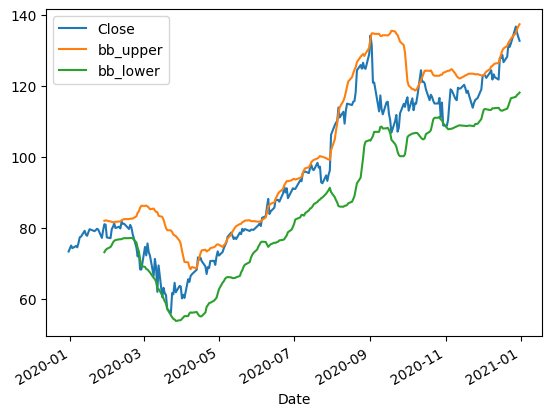

In [48]:
df_bb[['Close', 'bb_upper', 'bb_lower']].plot()

In [49]:
df_bb.head(20)

,Close,ma,std,bb_upper,bb_lower
Date,,,,,
2019-12-31,73.412498,NaN,NaN,NaN,NaN
2020-01-02,75.087502,NaN,NaN,NaN,NaN
2020-01-03,74.357498,NaN,NaN,NaN,NaN
2020-01-06,74.949997,NaN,NaN,NaN,NaN
2020-01-07,74.597504,NaN,NaN,NaN,NaN
2020-01-08,75.797501,NaN,NaN,NaN,NaN
2020-01-09,77.407501,NaN,NaN,NaN,NaN
2020-01-10,77.582497,NaN,NaN,NaN,NaN
2020-01-13,79.239998,NaN,NaN,NaN,NaN


In [50]:
df_bb.isna()

,Close,ma,std,bb_upper,bb_lower
Date,,,,,
2019-12-31,False,True,True,True,True
2020-01-02,False,True,True,True,True
2020-01-03,False,True,True,True,True
2020-01-06,False,True,True,True,True
2020-01-07,False,True,True,True,True
...,...,...,...,...,...
2020-12-24,False,False,False,False,False
2020-12-28,False,False,False,False,False
2020-12-29,False,False,False,False,False


In [51]:
df_bb.shape

(254, 5)

In [52]:
df_bb = df_bb.dropna()

In [53]:
df_bb.shape

(235, 5)

In [54]:
df_bb.head(20)

,Close,ma,std,bb_upper,bb_lower
Date,,,,,
2020-01-29,81.084999,77.631375,2.207977,82.047329,73.215421
2020-01-30,80.967499,78.009125,2.091398,82.191922,73.826328
2020-01-31,77.377502,78.123625,1.982899,82.089422,74.157828
2020-02-03,77.165001,78.264000,1.792484,81.848969,74.679032
2020-02-04,79.712502,78.502126,1.638813,81.779752,75.224499
2020-02-05,80.362503,78.790376,1.406407,81.603189,75.977562
2020-02-06,81.302498,79.065625,1.326250,81.718125,76.413125
2020-02-07,80.007500,79.195625,1.281849,81.759323,76.631928
2020-02-10,80.387497,79.335875,1.249096,81.834067,76.837684


In [55]:
df_bb.isna().sum()

Close       0
ma          0
std         0
bb_upper    0
bb_lower    0
dtype: int64

<Axes: xlabel='Date'>

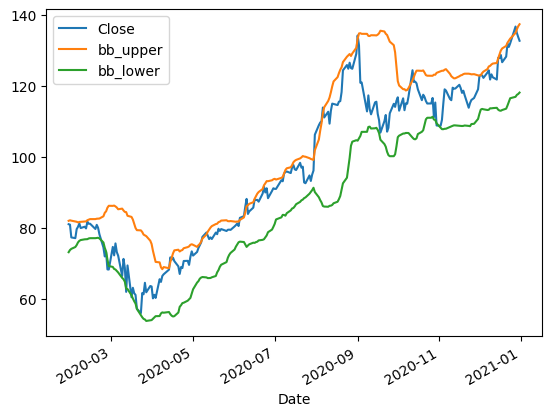

In [56]:
df_bb[['Close', 'bb_upper', 'bb_lower']].plot()